# Performance Measurements

Dataset: Pima Indians Diabetes Database - predict the onset of diabetes based upon diagnostic measures
Source: https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/pima-indians-diabetes-database.zip/1

Notebook adapted from https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

In [13]:
import pandas as pd
path = 'data/diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(path, header=0, names=col_names)

In [14]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [16]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/jbslanka/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred_class = logreg.predict(X_test)

In [19]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


Null accuracy: accuracy that could be achieved by always predicting the most frequent class

In [20]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [21]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [22]:
:
# calculate the percentage of zeros
1 - y_test.mean()

SyntaxError: invalid syntax (<ipython-input-22-40bb51a9e44d>, line 1)

In [23]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [24]:
# Compare true and predicted response values. print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


In [26]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [27]:
#Classification Accuracy: Overall, how often is the classifier correct?
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


In [28]:
# Classification Error: Overall, how often is the classifier incorrect?
# aka "Misclassification Rate"
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


Precision: When a positive value is predicted, how often is the prediction correct?

In [29]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


Recall: when the actual value is positive how often is the prediction correct?

Also called "Sensitivity" or the "True Positive Rate"

In [30]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


F1 Score: Harmonic Mean of Precision and Recall

$2 * \frac{ precision * recall }{ precision + recall} $

In [34]:
print(metrics.f1_score(y_test, y_pred_class))

0.3370786516853933


Specificity: When the actual value is negative, how often is the prediction correct? (aka, true negative rate)

In [32]:
print(TN / float(TN + FP))

0.9076923076923077


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [31]:
print(FP / float(TN + FP))

0.09230769230769231


Confusion matrix provides a more complete picture of how your classifier performs

Which metrics should you focus on?

* Choice of metric depends on your business objective
* Spam filter (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
* Fraudulent transaction detector (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

In [36]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [37]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


In [38]:
# precision
print(80  / float(80  + 50))

0.6153846153846154


In [39]:
# recall
print(46 / float(46 + 16))

0.7419354838709677


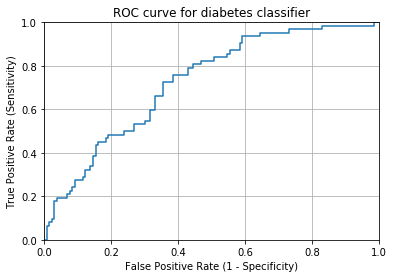

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

* ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
* You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [42]:

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Recall (sensitivity):', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [43]:
evaluate_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [44]:

evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


In [45]:
# AUC is the percentage of the ROC plot that is underneath the curve:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7245657568238213


Confusion matrix advantages:
* Allows you to calculate a variety of metrics
* Useful for multi-class problems (more than two response classes)

ROC/AUC advantages:
* Does not require you to set a classification threshold
* Still useful when there is high class imbalance

In [85]:
# from sklearn.metrics import precision_recall_curve
#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier(n_neighbors=11)
model = LogisticRegression()
model.fit(X_train, y_train)

/home/jbslanka/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(X_test)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probs)

In [87]:
f1 = metrics.f1_score(y_test, yhat)

In [88]:
auc = metrics.auc(recall, precision)

In [89]:
ap = metrics.average_precision_score(y_test, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

f1=0.337 auc=0.518 ap=0.529


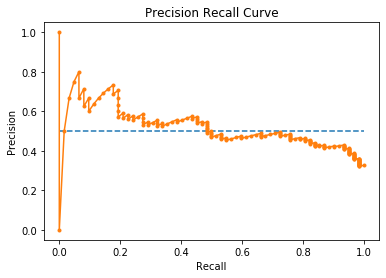

In [90]:
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')
plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the plot
plt.show()

## When to Use ROC vs. Precision-Recall Curves?

Both:
* allow predictive performance to be assessed at various levels of confidence
* assume binary classification tasks
* sometimes summarized by calculating area under the curve 


Generally, the use of ROC curves and precision-recall curves are as follows:

* ROC curves should be used when there are roughly equal numbers of observations for each class.
* Precision-Recall curves should be used when there is a moderate to large class imbalance.